In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import glob
import os
from pathlib import Path
from plaid.evaluation import batch_rmsd_calculation, run_tmalign, RITAPerplexity, batch_rmspd_from_pdb_paths
from plaid.utils import extract_avg_b_factor_per_residue, read_sequences_from_fasta
import numpy as np
import matplotlib.pyplot as plt

# sample_dir = Path("/data/lux70/plaid/artifacts/samples/5j007z42/by_length/")
sample_dir = Path("/data/lux70/plaid/artifacts/samples/5j007z42/by_length/")
# sample_dir = Path("/data/lux70/plaid/artifacts/samples/by_length/")

# Structure

In [8]:
length = str(32)

## PLAID

In [9]:
# rita_perplexity = RITAPerplexity()

In [32]:
from plaid.utils import read_sequences_from_fasta 
inv_gen_seq_dict = read_sequences_from_fasta(sample_dir / length / "generated/sequences.fasta")

In [33]:
phan_gen_seq_dict = read_sequences_from_fasta(sample_dir / length / "phantom_generated/sequences.fasta")

In [34]:
gen_seq_dict = read_sequences_from_fasta(sample_dir / length / "generated/sequences.fasta")

In [ ]:
# ccrmsd_aa = batch_rmsd_calculation(inverse_gen_pdbs, generated_pdbs, ca_only=False)
# ccrmsd_bb = batch_rmsd_calculation(inverse_gen_pdbs, generated_pdbs, ca_only=True)
ccrmspd = batch_rmspd_from_pdb_paths(inverse_gen_pdbs, generated_pdbs)
cctm = [run_tmalign(p1,p2) for (p1,p2) in zip(inverse_gen_pdbs, generated_pdbs)]

# scrmsd_aa = batch_rmsd_calculation(phantom_gen_pdbs, generated_pdbs, ca_only=False)
# scrmsd_bb = batch_rmsd_calculation(phantom_gen_pdbs, generated_pdbs, ca_only=True)
sctm = [run_tmalign(p1,p2) for (p1,p2) in zip(phantom_gen_pdbs, generated_pdbs)]
scrmspd = batch_rmspd_from_pdb_paths(inverse_gen_pdbs, generated_pdbs)

plddts = [np.mean(extract_avg_b_factor_per_residue(pdb_path)) for pdb_path in generated_pdbs]

In [4]:


# perplexities = [rita_perplexity.calc_perplexity(s) for s in sequences]

length_stats = {
    "length": length,
    # "ccrmsd_aa": ccrmsd_aa,
    # "ccrmsd_bb": ccrmsd_bb,
    # "scrmsd_bb": scrmsd_bb,
    "cctm": cctm,
    "sctm": sctm,
    "plddts": plddts,
    "ccrmspd": ccrmspd,
    "scrmspd": scrmspd
    # "perplexities": perplexities
}
return length_stats



In [5]:
all_stats = {}
for length in os.listdir(sample_dir):
    res = get_stats(length)
    all_stats[length] = res

lengths = [int(x) for x in all_stats.keys()]
lengths.sort()


KeyboardInterrupt



In [1]:
metric = "cctm"

fig,ax = plt.subplots(1,1,figsize=(4,4), dpi=200)

designable = []

for k, v in all_stats.items():
    data = v[metric]
    designable.append((np.array(data) > 0.5).sum() / len(data))
    
    ax.scatter([int(k) * 2] * len(data), data, s=1, c="teal")
ax.set_ylim(0,1)

ax.set_ylabel("TMScore")

scale = np.arange(64, 513, 16)
ax_ = ax.twinx()
ax_.plot(scale, designable, c="orange", s=3, alpha=0.2)
ax_.set_ylim(0, 1)
ax_.set_ylabel("Fraction of designs >0.5 ccTM")
ax_.axhline(0.5, c='red')

plt.title("ccTM", fontsize=16)

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'scTM')

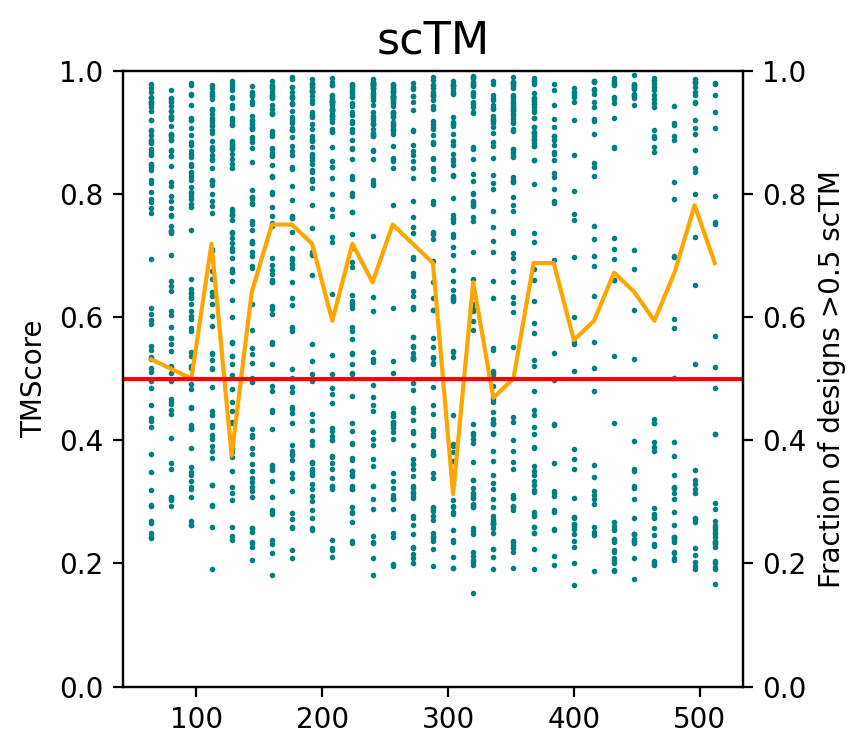

In [54]:
metric = "sctm"

fig,ax = plt.subplots(1,1,figsize=(4,4), dpi=200)

designable = []

for k, v in all_stats.items():
    data = v[metric]
    designable.append((np.array(data) > 0.5).sum() / len(data))
    
    ax.scatter([int(k) * 2] * len(data), data, s=1, c="teal")
ax.set_ylim(0,1)

ax.set_ylabel("TMScore")

scale = np.arange(64, 513, 16)
ax_ = ax.twinx()
ax_.plot(scale, designable, c="orange")
ax_.set_ylim(0, 1)
ax_.set_ylabel("Fraction of designs >0.5 scTM")
ax_.axhline(0.5, c='red')

plt.title("scTM", fontsize=16)

Text(0.5, 1.0, 'ccRMSPD')

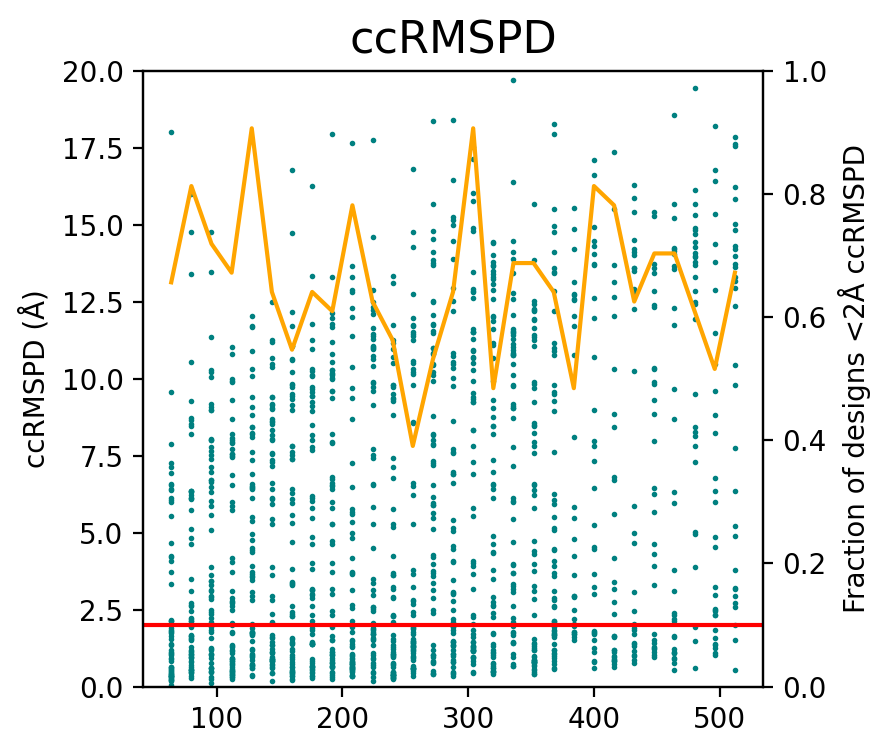

In [56]:
metric = "ccrmspd"

fig,ax = plt.subplots(1,1,figsize=(4,4), dpi=200)

designable = []

for k, v in all_stats.items():
    data = v[metric]
    designable.append((np.array(data) > 2).sum() / len(data))
    ax.scatter([int(k) * 2] * len(data), data, s=1, c="teal")
ax.set_ylim(0,20)
ax.set_ylabel("ccRMSPD (Å)")
ax.axhline(y=2, c='red')

scale = np.arange(64, 513, 16)
ax_ = ax.twinx()
ax_.plot(scale, designable, c="orange")
ax_.set_ylim(0, 1)
ax_.set_ylabel("Fraction of designs <2Å ccRMSPD")
plt.title("ccRMSPD", fontsize=16)

Text(0.5, 1.0, 'scRMSPD')

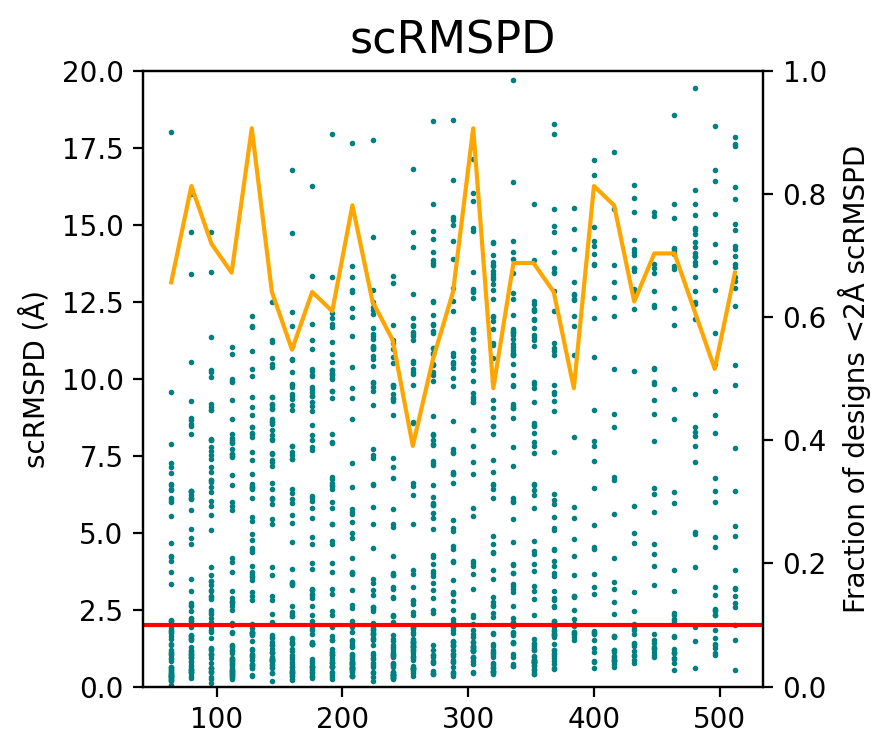

In [57]:
metric = "scrmspd"

fig,ax = plt.subplots(1,1,figsize=(4,4), dpi=200)

designable = []

for k, v in all_stats.items():
    data = v[metric]
    designable.append((np.array(data) > 2).sum() / len(data))
    ax.scatter([int(k) * 2] * len(data), data, s=1, c="teal")
ax.set_ylim(0,20)
ax.set_ylabel("scRMSPD (Å)")
ax.axhline(y=2, c='red')

scale = np.arange(64, 513, 16)
ax_ = ax.twinx()
ax_.plot(scale, designable, c="orange")
ax_.set_ylim(0, 1)
ax_.set_ylabel("Fraction of designs <2Å scRMSPD")
plt.title("scRMSPD", fontsize=16)